In [1]:
# Домашнее задание №2: bonus по курсу "Машинное обучение"
# Выполнила Мирейко Наталья

% matplotlib inline

import csv
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

data_x = []
data_y = []

#Читаем данные из файла
with open('basketball.csv', 'rb') as csv_file:
    basketball_reader = csv.reader(csv_file, delimiter=',', quotechar='|')
    next(basketball_reader, None)  # skip the headers
    for row in basketball_reader:
        data_x.append([row[0], row[1], row[2], row[3]])
        data_y.append([row[4]])

X = np.array(data_x, dtype=float).transpose()
Y = np.array(data_y, dtype=float)

In [2]:
def calculate_mse(X, Y, W):
    sum = 0
    for index, x in enumerate(X.transpose()):
         sum += pow((x.dot(W) - Y[index][0]).item(), 2)
    return sum / Y.shape[0]

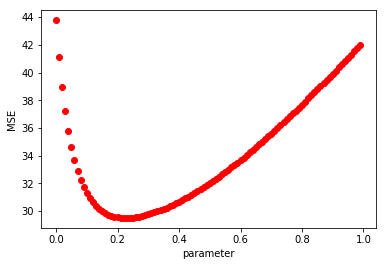

In [3]:
from sklearn.linear_model import Ridge

plt.xlabel('parameter')
plt.ylabel('MSE')

for parameter in xrange(0, 100, 1):
    ridge = Ridge(alpha=parameter / 100, copy_X=True, fit_intercept=True, max_iter=None,
                  normalize=True, random_state=None, solver='auto', tol=0.001)
    ridge.fit(X.transpose(), Y.transpose()[0])
    #Наносим точку на график
    plt.plot(parameter / 100, calculate_mse(X, Y, ridge.coef_), 'ro')

plt.show()